## Modulo | Lecutra de Datos | Christopher H. Rodriguez P.


In [ ]:
# Incluimos Liberia | Habilitamos la Grafica comparativa para la presicion de los Modelos
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py


In [ ]:
# Importamos el Modulo de Google | Para la lecutra de Datos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importamos las liberiras para la lecutra de datos

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
train = pd.read_csv('/content/drive/MyDrive/Tarea 3 /train.csv')
test = pd.read_csv('/content/drive/MyDrive/Tarea 3 /test.csv')
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [ ]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  


## Preanalitica de Datos | EDA Caracteristica | Christopher H. Rodriguez P.

In [ ]:
# Numero de las filas duplicadas
train.duplicated().sum()

0

In [ ]:
# Numero de NaN valores para las columnas
train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
# Estadistica general del Data Set
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


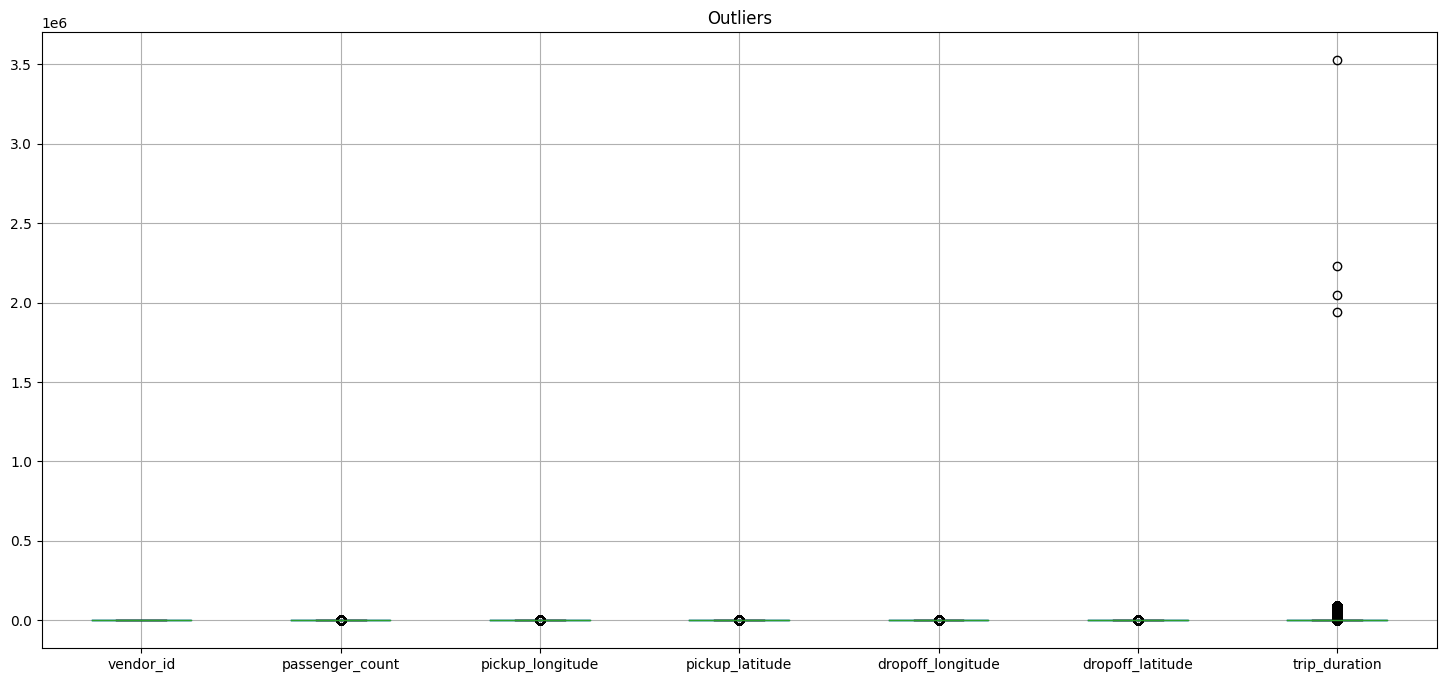

In [ ]:
#Visualizacion de los datos Estatidisticos
plt.subplots(figsize=(18,8))
plt.title("Outliers")
train.boxplot();

In [ ]:
# Filtramos los datos a viajes con uan duracion de menos de 6000
# Para evitar predicciones erroneas del Modelado

train = train[(train.trip_duration < 6000)]

In [ ]:
# Filtramos los datos de los pasajeros para unicamente mantener los viajes con pasajeros
train = train[(train.passenger_count > 0)]

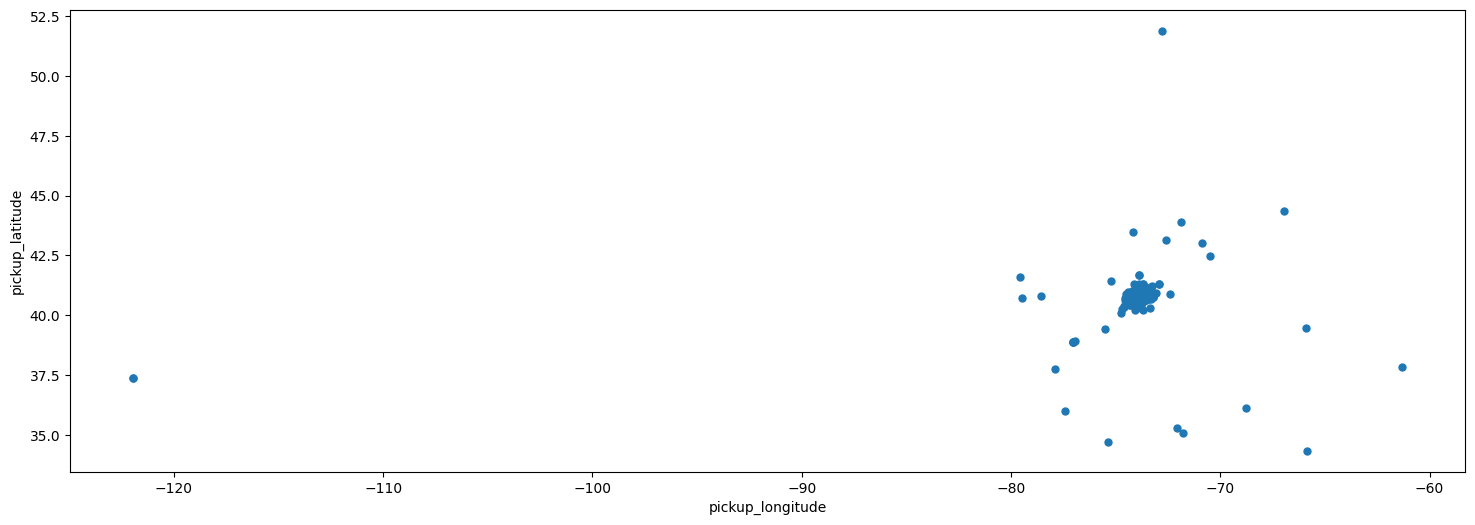

In [ ]:
#Gráfico pickup posición para visualizar outliers

pickup_longitude = list(train.pickup_longitude)
pickup_latitude = list(train.pickup_latitude)
plt.subplots(figsize=(18,6))
plt.plot(pickup_longitude, pickup_latitude, '.', alpha = 1, markersize = 10)
plt.xlabel('pickup_longitude')
plt.ylabel('pickup_latitude')
plt.show()

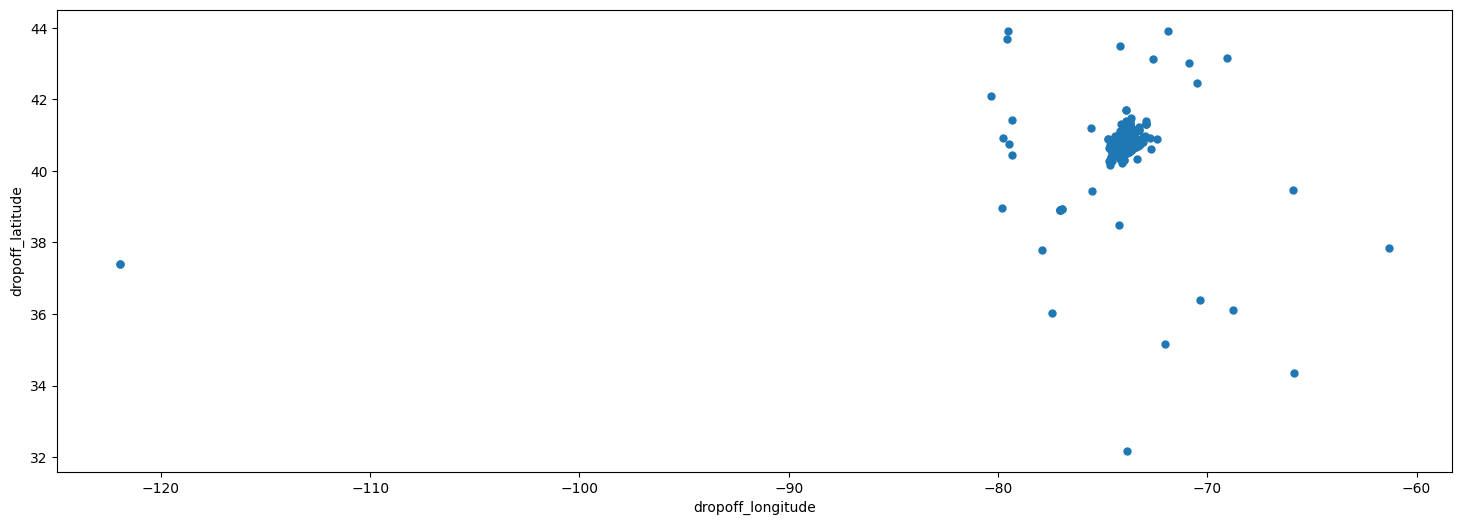

In [ ]:
#Gráfico dropoff posición para visualizar outliers

dropoff_longitude = list(train.dropoff_longitude)
dropoff_latitude = list(train.dropoff_latitude)
plt.subplots(figsize=(18,6))
plt.plot(dropoff_longitude, dropoff_latitude, '.', alpha = 1, markersize = 10)
plt.xlabel('dropoff_longitude')
plt.ylabel('dropoff_latitude')
plt.show()

In [ ]:
#Remover outliers

train = train[(train.pickup_longitude > -100)]
train = train[(train.pickup_latitude < 50)]

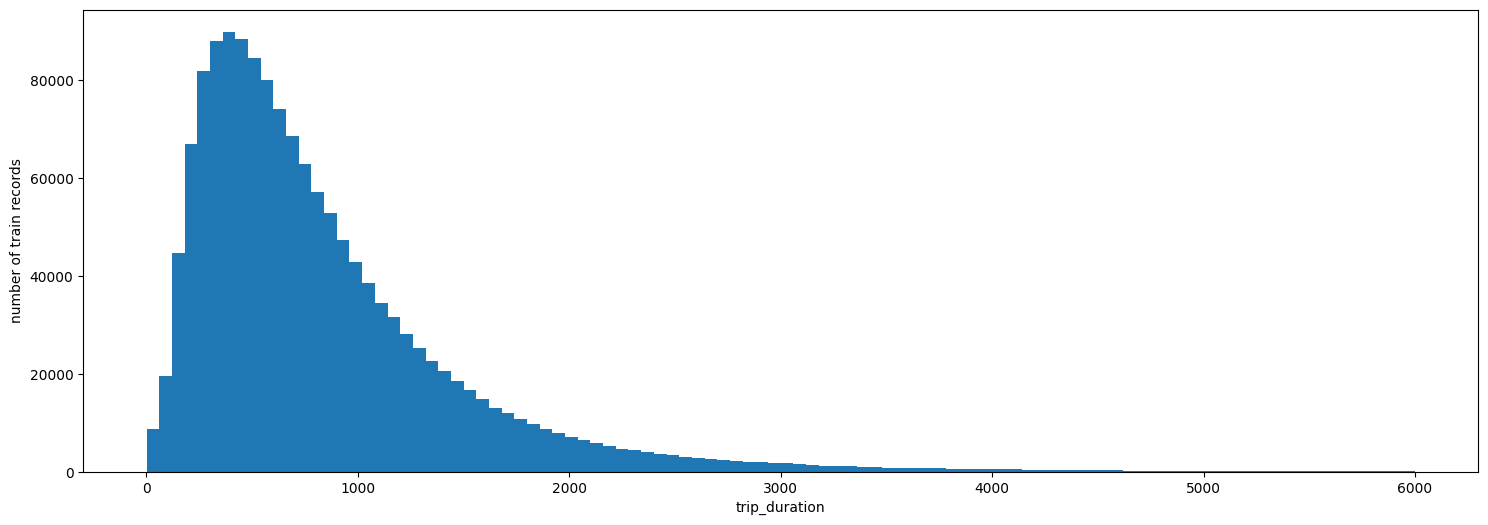

In [ ]:
#Visualizar la distribución de la variable respuesta trip_duration

plt.subplots(figsize=(18,6))
plt.hist(train['trip_duration'].values, bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

## Modificamos los datos basado en los Requerimientos | Christopher H. Rodriguez P.

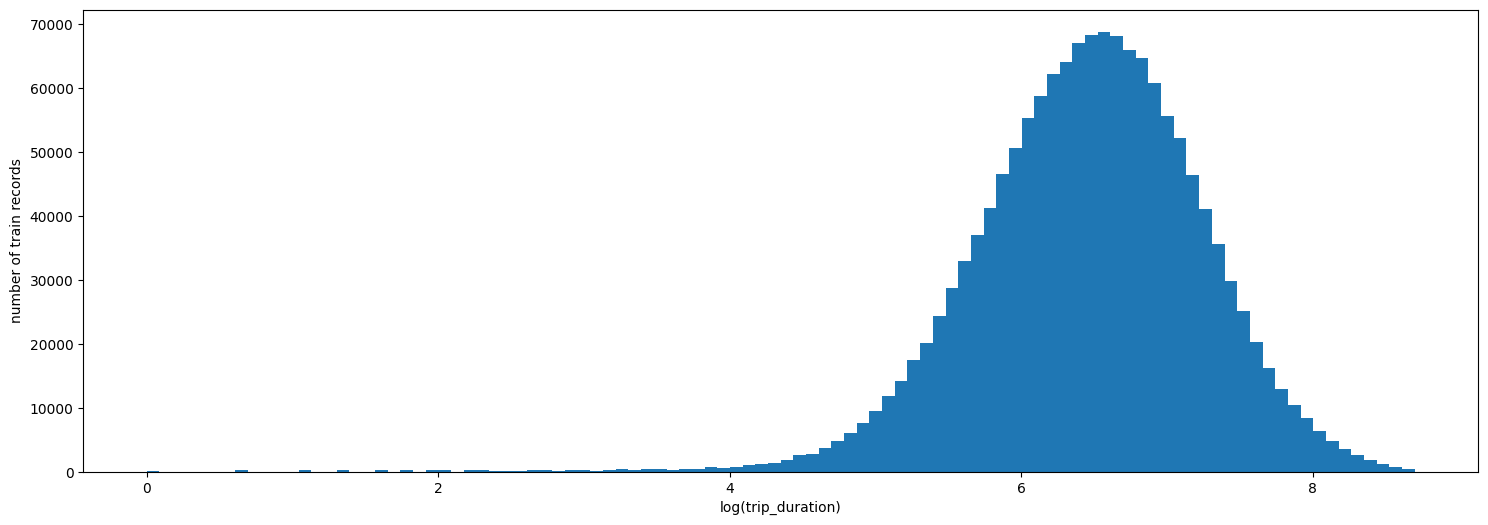

In [ ]:
# Transformacion Logaritmica

plt.subplots(figsize=(18,6))
train['trip_duration'] = np.log(train['trip_duration'].values)
plt.hist(train['trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

In [ ]:
#Modificamos categóricas flag y vendor_id
train = pd.concat([train, pd.get_dummies(train['store_and_fwd_flag'])], axis=1)
test = pd.concat([test, pd.get_dummies(test['store_and_fwd_flag'])], axis=1)

train.drop(['store_and_fwd_flag'], axis=1, inplace=True)

train = pd.concat([train, pd.get_dummies(train['vendor_id'])], axis=1)
test = pd.concat([test, pd.get_dummies(test['vendor_id'])], axis=1)

train.drop(['vendor_id'], axis=1, inplace=True)

In [ ]:
#Modificar datos de Fecha
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
test['pickup_datetime'] = pd.to_datetime(test.pickup_datetime)

train.drop(['dropoff_datetime'], axis=1, inplace=True)

#Separarlo en características y borrar lo innecesario
train['month'] = train.pickup_datetime.dt.month
train['week'] = train.pickup_datetime.dt.week
train['weekday'] = train.pickup_datetime.dt.weekday
train['hour'] = train.pickup_datetime.dt.hour
train['minute'] = train.pickup_datetime.dt.minute
train['minute_oftheday'] = train['hour'] * 60 + train['minute']
train.drop(['minute'], axis=1, inplace=True)

test['month'] = test.pickup_datetime.dt.month
test['week'] = test.pickup_datetime.dt.week
test['weekday'] = test.pickup_datetime.dt.weekday
test['hour'] = test.pickup_datetime.dt.hour
test['minute'] = test.pickup_datetime.dt.minute
test['minute_oftheday'] = test['hour'] * 60 + test['minute']
test.drop(['minute'], axis=1, inplace=True)

train.drop(['pickup_datetime'], axis=1, inplace=True)

train.info()

<ipython-input-27-c0146351712e>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train['week'] = train.pickup_datetime.dt.week
<ipython-input-27-c0146351712e>:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test['week'] = test.pickup_datetime.dt.week


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456015 entries, 0 to 1458643
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 1456015 non-null  object 
 1   passenger_count    1456015 non-null  int64  
 2   pickup_longitude   1456015 non-null  float64
 3   pickup_latitude    1456015 non-null  float64
 4   dropoff_longitude  1456015 non-null  float64
 5   dropoff_latitude   1456015 non-null  float64
 6   trip_duration      1456015 non-null  float64
 7   N                  1456015 non-null  uint8  
 8   Y                  1456015 non-null  uint8  
 9   1                  1456015 non-null  uint8  
 10  2                  1456015 non-null  uint8  
 11  month              1456015 non-null  int64  
 12  week               1456015 non-null  int64  
 13  weekday            1456015 non-null  int64  
 14  hour               1456015 non-null  int64  
 15  minute_oftheday    1456015 non-n

In [ ]:
#Se calcula la distancia entre el punto de partida y el de llegada
#Distancia Haversine es la distancia entre dos puntos en la Tierra a lo largo de una línea que los une.

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Radius of Earth in km
R = 6367

def haversine_np(lon1, lat1, lon2, lat2):
  lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

  dlon = lon2 - lon1
  dlat = lat2 - lat1

  a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

  c = 2 * np.arcsin(np.sqrt(a))
  km = R * c
  return km

In [ ]:
#Se incluye la variable distancia en el modelo, expresada en kilómetros
train['distance'] = haversine_np(train['pickup_longitude'], train['pickup_latitude'],
                              train['dropoff_longitude'], train['dropoff_latitude'])
train.head()

,id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,N,Y,1,2,month,week,weekday,hour,minute_oftheday,distance
0,id2875421,1,-73.982155,40.767937,-73.964630,40.765602,6.120297,1,0,0,1,3,11,0,17,1044,1.497580
1,id2377394,1,-73.980415,40.738564,-73.999481,40.731152,6.496775,1,0,1,0,6,23,6,0,43,1.804374
2,id3858529,1,-73.979027,40.763939,-74.005333,40.710087,7.661056,1,0,0,1,1,3,1,11,695,6.381090
3,id3504673,1,-74.010040,40.719971,-74.012268,40.706718,6.061457,1,0,0,1,4,14,2,19,1172,1.484566
4,id2181028,1,-73.973053,40.793209,-73.972923,40.782520,6.075346,1,0,0,1,3,12,5,13,810,1.187842


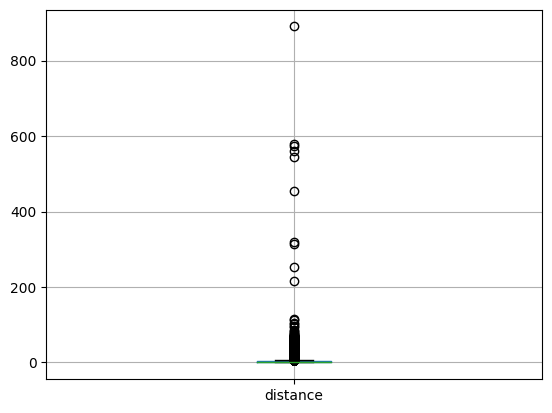

In [ ]:
#Visualizar outliers de la variable distancia
train.boxplot(column='distance', return_type='axes');

In [ ]:
#Remover outliers de distancia
train = train[(train.distance < 200)]

In [ ]:
#Crear variable velocidad usando fórmula física v = d/t
train['speed'] = train.distance / train.trip_duration

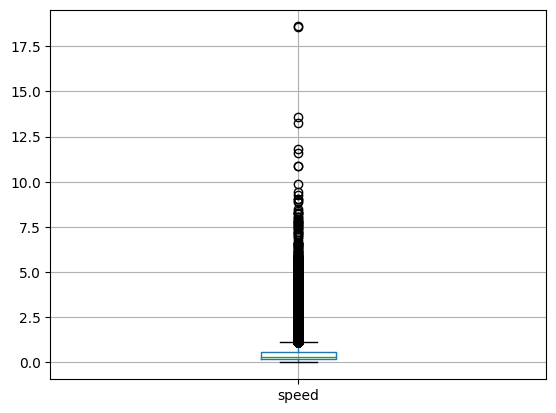

In [ ]:
#Visualizar datos de velocidad
train.boxplot(column='speed', return_type='axes');

In [ ]:
#Remover outliers velocidad
train = train[(train.speed < 30)]

<ipython-input-38-2c35fbd5246f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=train.corr(), annot=True, cmap = plt.cm.RdYlBu_r, linewidths=.1, ax=ax).set_title('Correlations between variables');


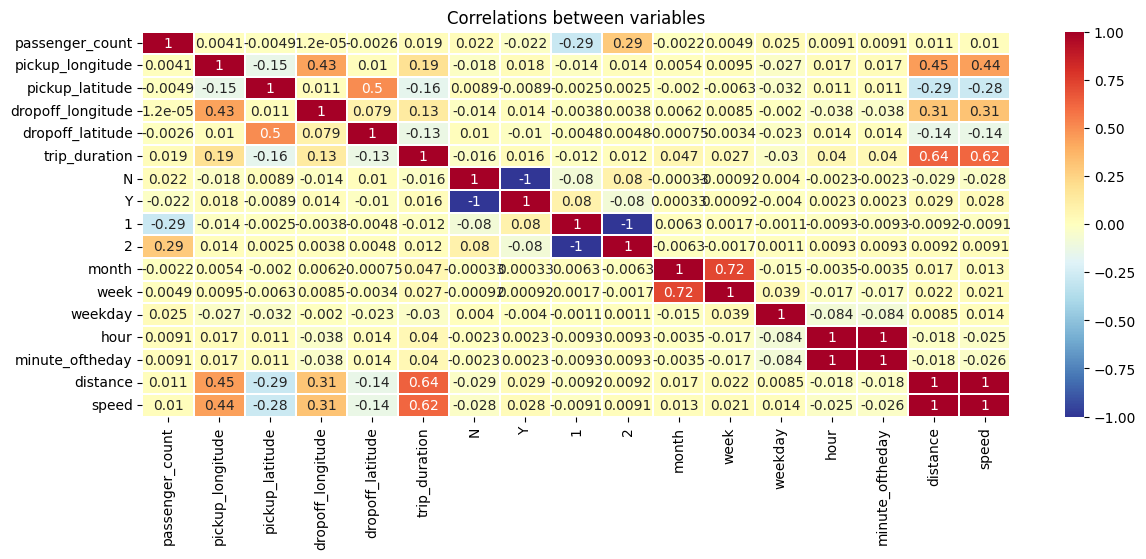

In [ ]:
#Correlación entre variables
fig, ax = plt.subplots(figsize=(14,5))
sns.heatmap(data=train.corr(), annot=True, cmap = plt.cm.RdYlBu_r, linewidths=.1, ax=ax).set_title('Correlations between variables');

In [ ]:
# Dataframe Resultante
train.head()

,id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,N,Y,1,2,month,week,weekday,hour,minute_oftheday,distance,speed
0,id2875421,1,-73.982155,40.767937,-73.964630,40.765602,6.120297,1,0,0,1,3,11,0,17,1044,1.497580,0.244691
1,id2377394,1,-73.980415,40.738564,-73.999481,40.731152,6.496775,1,0,1,0,6,23,6,0,43,1.804374,0.277734
2,id3858529,1,-73.979027,40.763939,-74.005333,40.710087,7.661056,1,0,0,1,1,3,1,11,695,6.381090,0.832926
3,id3504673,1,-74.010040,40.719971,-74.012268,40.706718,6.061457,1,0,0,1,4,14,2,19,1172,1.484566,0.244919
4,id2181028,1,-73.973053,40.793209,-73.972923,40.782520,6.075346,1,0,0,1,3,12,5,13,810,1.187842,0.195518



## Creacion de Modelos | Evaluacion

In [ ]:
#Dividir el marco de datos en dos conjuntos
y = train['trip_duration']
train.drop(['trip_duration'], axis=1, inplace=True)
train.drop(['id'], axis=1, inplace=True)
X = train
print (X.shape, y.shape)

(1455973, 16) (1455973,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1164778, 16), (1164778,), (291195, 16), (291195,))

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

**Modelo Gradient Boosting**

Los árboles de decisión son una técnica de aprendizaje automático que permite clasificar o regresionar datos basándose en reglas simples. El Gradient Boosting es un método que combina varios árboles de decisión para crear un modelo más potente y preciso.

Cada árbol se entrena de manera secuencial, intentando corregir los errores cometidos por los árboles anteriores. Así, la predicción final se obtiene sumando las predicciones de todos los árboles que componen el modelo.

---



In [ ]:
#Modelo GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
print(gb.score(X_train, y_train), gb.score(X_test, y_test))
print(np.sqrt(MSE(y_test, gb.predict(X_test))))

#Salida:
    #Train score: 0.8095792258524722 Test score: 0.8091995234208894
    #RMSE: 0.33922663242755513
    #CPU times: user 9min 9s, sys: 328 ms, total: 3min 48s
    #Wall time: 9min 9s

AttributeError: ignored

**Modelo LigthGBM**

text
El GBM ligero es un método de aprendizaje automático basado en árboles de decisión que utiliza el algoritmo de impulso de gradiente para mejorar el rendimiento y la precisión.

A diferencia de otros métodos de impulso, el GBM ligero crece los árboles verticalmente, es decir, se centra en las hojas que tienen el mayor error y las divide para reducir la pérdida. Esto hace que el GBM ligero sea más rápido y eficiente que otros métodos de impulso, y lo convierte en una herramienta útil para el análisis, la clasificación y otras tareas de inteligencia artificial.

In [ ]:
import lightgbm as lgb

lgb_params = {
    'metric': 'rmse',
    'is_training_metric': True}

lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test)
lgb_model = lgb.train(lgb_params, lgb_train, num_boost_round=100, valid_sets=[lgb_train, lgb_test], early_stopping_rounds=5)

#Salida
    #[100]	valid_0's rmse: 0.205	valid_1's rmse: 0.204
      #Wall time: 15 s

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.086766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1866
[LightGBM] [Info] Number of data points in the train set: 1164778, number of used features: 16
[LightGBM] [Info] Start training from score 6.457252
[1]	training's rmse: 0.721829	valid_1's rmse: 0.721628
Training until validation scores don't improve for 5 rounds
[2]	training's rmse: 0.672771	valid_1's rmse: 0.672632
[3]	training's rmse: 0.6291	valid_1's rmse: 0.629095
[4]	training's rmse: 0.590258	valid_1's rmse: 0.590274
[5]	training's rmse: 0.556088	valid_1's rmse: 0.556116
[6]	training's rmse: 0.525947	valid_1's rmse: 0.525942
[7]	training's rmse: 0.498832	valid_1's rmse: 0.498848
[8]	training's rmse: 0.47606	valid_1's rmse: 0.476063
[9]	training's rmse: 0.454214	valid_1's rmse: 0.454134
[10]	training's rmse: 0.435825	valid_

In [ ]:
#LightGBM with sklearn API
from lightgbm import LGBMRegressor

lgbm = lgb.LGBMRegressor()
lgbm.fit(X, y)
print(lgbm.score(X_train, y_train), lgbm.score(X_test, y_test))
print(np.sqrt(MSE(y, lgbm.predict(X))))

#Salida:
    #Train score: 0.9297961037681841 Test score: 0.931331117092785
    #RMSE: 0.2035073994832469
    #Wall time: 24 s

0.9297961037681841 0.931331117092785
0.2053845408173023


*Se elige el modelo LightGBM porque es mas ligero, su tiempo de ejecución es corto, ademas presenta un mejor score y el error cuadrático medio (RMSE) es mas bajo, por lo tanto, las predicciones son mas acertadas.* ✔

In [ ]:
#Validación cruzada modelo LightGBM

lgb_df = lgb.Dataset(X, y)
lgb.cv(lgb_params, lgb_df, stratified=False)

#Validación cruzada modelo LightGBM (sklearn API)
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(lgbm, X, y, cv=5)
print(cv_score)
print(np.mean(cv_score))

#Salida:
    #[0.9275299  0.92828339 0.92874037 0.93013997 0.92922119]
    # 0.928782965555038

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.209804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1867
[LightGBM] [Info] Number of data points in the train set: 1164776, number of used features: 16
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.225788 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1867
[LightGBM] [Info] Number of data points in the train set: 1164776, number of used features: 16
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.218306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1867
[LightGBM] [Info] Number of data points in the train set: 1164776, number of used features: 16
[LightGBM] [Warning] Auto-choosing col-wise multi-thre

Nuestro modelo es estable

## Conclusiones | Tarea No3 | Christopher H. Rodriguez P.|

In [ ]:
def rel_RMSE(estimator, X, y):
    lgbm.fit(X, y)
    return np.sqrt(MSE(y, lgbm.predict(X)))

In [ ]:
from sklearn.model_selection import ShuffleSplit
from local.lib import calhousing as ch
%matplotlib inline
lgbm = lgb.LGBMRegressor()
lgbm.fit(X, y)

cv = ShuffleSplit(n_splits=10, test_size=.2)
ch.plot_learning_curve(lgbm, lgbm.__class__.__name__, X, y, cv=cv, scoring= rel_RMSE, ylim=(0.18,0.22))
